# Overview of Machine Learning

Machine Learning (ML) is a subfield of Artificial Intelligence that uses computation to build models from data. Like modeling tasks in other fields, the goal of machine learning is to represent a real-world system in a meaningful way. Generally, ML algorithms take various forms of data and look for underlying relationships that may have gone unnoticed by humans - all without being explicitly programmed to do so!

The algorithms themselves are based on statistics and mathematical optimization techniques. There are different types of algorithms available, and the appropriate ones to apply will largely depend on the data and the problem at hand. Algorithms are usually grouped by the following type:

- **Supervised learning algorithms**: learn patterns from labeled data then apply those patterns to make accurate predictions about new, similar data
- **Unsupervised learning algorithms**: give insight into the structure of the data or reduce the number of variables (or features) to those that are relevant
- **Recommender system algorithms**: learn relationships within data to make useful recommendations
- **Reinforcement learning algorithms**: find the optimal way to perform a task or learn how to interact in an environment, given a system of rewards and punishments

Machine Learning is closely related to predictive statistics, and is sometimes referred to as predictive analytics or predictive modeling.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import sklearn.datasets
from sklearn.model_selection import train_test_split

## Supervised Learning

Supervised learning is in the realm of building models to make predictions. The data that are fed to the machine learning algorithms include the "answer" or outcome the model needs to predict, which is also called the target variable or label. The model uses this to learn the relationships between the independent variables (the input, or features) and the labels, and that mapping is later applied to new, unseen data to make predictions going forward.

Supervised learning is further broken down by the type of problem - there are **classification** problems, which predict a class or category of an observation, and **regression** problems, which predict a numerical value for an observation.

### Classification

Examples of classification algorithms:

- **Logistic Regression**: applies sigmoid function to linear regression, can use either $L_1$ or $L_2$ norm
- **$k$-Nearest Neighbors (kNN)**: finds $k$-nearest neighbors based on a similarity function and uses majority vote to determine the class
- **Random forest classifier**:
- **Stochastic Gradient Descent classifier**: capable of handling large datasets and training in batches (or each instance independently)
- [TO COME]

#### Performance Measures

Classification problems use performance measures that tie closely to the **confusion matrix**, which is a grid of actual labels against the model's predicted results. The best performance measure to optimize for a model will depend on the specifics of the problem.

| Actual: | Predicted False | Predicted True |
| ----- | ----- | ----- |
| **Is False** | True Negative (TN) | False Positive (FP) |
| **Is True** | False Negative (FN) | True Positive (TP) |


A **type I error** (false negative) is when the label is true but the observation is incorrectly classified as false. The probability of a type I error is called **alpha risk**. A **type II error** (false positive) is when the label is false but the observation is incorrectly classified as true. The probability of a type II error is called **beta risk**.

- **Accuracy**: the fraction of correct predictions to total predictions $\frac{TN + TP}{TN + FN + TP + FP}$
- **Precision**: the rate of true positives to everything predicted as positive. In other words, when the model claims an observation is positive, it's correct this percent of the time. High precision means there are few observations in the negative class falsely predicted as positives. Precision is a good metric to use when what is classified as positive MUST be correct (predicting appropriate videos for kids) $\frac{TP}{TP + FP}$
- **Recall (sensitivity, true positive rate, TPR)**: the rate of true positives to everything that is positive, or in other words, the percent of all the positives the model detects. High recall shows the model is good at detective the positive class. Recall is an appropriate metric to use when you can't let any positives slip through the cracks (like predicting malignant tumors so patient receives timely treatment) $\frac{TP}{TP + FN}$
- **F1 Score**: the harmonic mean of precision and recall - both values for precision and recall must be high to approach the highest possible value of 1. F1 score is good for situations that don't favor either precision or recall, but want to maximize both, or for when the positive class is scarce $\frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$
- **Specificity (true negative rate, TNR)**: the rate of true negatives to everything that is negative $\frac{TN}{TN + FP}$
- **False positive rate (FPR)**: the rate of negative values falsely classified as positive to everything that is negative $\frac{FP}{TN + FP}$
- **False negative rate (FNR)**: the rate of positive values falsely classified as negative to everything that is  positive $\frac{FN}{TP + FN}$
- **Receiver Operating Characteristic (ROC)**: plots the FPR (the ratio of incorrectly classified negative values to all negative values) against the TPR/recall/sensitivity (the ratio of correctly classified positive values to all positive values). As the threshold shifts (to left) to increase the TPR, it incorrectly classifies more and more negative values as positive and vice versa. The total **area under the ROC curve (AUROC)** is 1, indicating a perfect classifier (and area of 0.5 represents a completely random classifier). This metric is similar to precision-recall and F1 - use them when the positive class is scarce or when you care more about the false positives than the false negatives, use ROC otherwise.

In [18]:
# Analysis meant as demonstration of performance measures only - no EDA, data cleaning,
#    or model tuning has been performed

# Import classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Import scikit learn metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [3]:
# Import toy wine dataset from scikit learn
wine = sklearn.datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
# Create DataFrame to lightly explore data
# wdf = pd.DataFrame(wine['data'], columns=wine['feature_names'])
# wdf.head()

In [5]:
X = wine['data']

# Convert labels to binary classification problem
#    postive: class_0, negative: class_1 or class_2)
y = (wine['target'] == 0).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [6]:
# Create and fit a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [8]:
# Create a confusion matrix - predictions vs labels
y_train_pred_rf = cross_val_predict(rf, X_train, y_train, cv=3)

cm_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_rf

array([[94,  1],
       [ 3, 44]])

In [9]:
# Precision: what percent of the positive preditions were correct?
p = precision_score(y_train, y_train_pred_rf)

# Recall: how many positive labels were correctly classified
r = recall_score(y_train, y_train_pred_rf)

# F1: similar precision and recall
f_1 = f1_score(y_train, y_train_pred_rf)

print('Precision: {0:.4f}'.format(p))
print('Recall/Sensitivity/TPR: {0:.4f}'.format(r))
print('F1 score: {0:.4f}'.format(f_1))

Precision: 0.9778
Recall/Sensitivity/TPR: 0.9362
F1 score: 0.9565


In [13]:
# Check different score types across 3-fold cross validation
score_types = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for score in score_types:
    vals = cross_val_score(rf, X_train, y_train, cv=3, scoring=score)
    print('Method: {}'.format(score))
    print('Results: {}'.format(vals))
    print()

# See multiple scoring methods with classification_report(y_true, y_predicted)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_rf))

Method: accuracy
Results: [0.9375     1.         0.97826087]

Method: precision
Results: [1.     1.     0.9375]

Method: recall
Results: [0.8125 1.     1.    ]

Method: f1
Results: [0.89655172 1.         0.96774194]

Method: roc_auc
Results: [1. 1. 1.]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.94      0.96        47

   micro avg       0.97      0.97      0.97       142
   macro avg       0.97      0.96      0.97       142
weighted avg       0.97      0.97      0.97       142



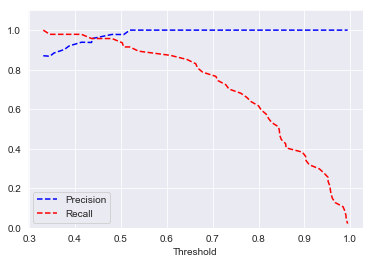

In [14]:
# Generate RandomForestClassifier scores to plot P-R and ROC
# sklearn classifiers have either a decision_function() (returns decision scores) or
#    predict_proba() (returns array of rows for each instance, cols for neg and pos class probs)
# cross_val_predict returns an array with probabilities for negative and positive classes
y_scores_rf = cross_val_predict(rf, X_train, y_train, cv=3, method='predict_proba')

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf[:, 1])

# Plot precision and recall values against thresholds
plt.plot(thresholds_rf, precisions_rf[:-1], "b--", label="Precision")
plt.plot(thresholds_rf, recalls_rf[:-1], "r--", label="Recall")
plt.legend()
plt.ylim([0, 1.1])
# plt.margins(0.2)
plt.xlabel("Threshold")
plt.show()

Area under the ROC curve: 0.9973


Text(0.5, 1.0, 'Random Forest ROC Curve')

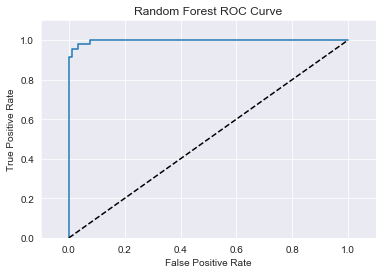

In [17]:
# ROC Curve
fpr_rf, tpr_rf, thresholds_roc_rf = roc_curve(y_train, y_scores_rf[:, 1])
auc_rf = roc_auc_score(y_train, y_scores_rf[:, 1])

print('Area under the ROC curve: {0:.4f}'.format(auc_rf))

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([-0.1, 1.1, 0, 1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")

In [ ]:
# Grid search cross validation to tune model hyperparameters



### Regression

Regression problems use a dataset's features to try to make real-valued predictions, such as the price of a stock or value of a property.

The **$R^2$** score gives the amount of variance in the target variable that's predicted by features in the model.

In [96]:
# Analysis meant as demonstration of performance measures only - no EDA, data cleaning,
#    or model tuning has been performed

# Import model
from sklearn.ensemble import RandomForestRegressor

# Import scikit learn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
# Import toy Boston housing dataset from scikit learn
boston = sklearn.datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [105]:
# Create DataFrame to lightly explore data
# bdf = pd.DataFrame(boston['data'], columns=boston['feature_names'])
# bdf.head()

In [99]:
X_reg = boston['data']
y_reg = boston['target']

# Split into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg,
                                                                    test_size=0.2,
                                                                    random_state=42)

print(X_reg_train.shape, X_reg_test.shape, y_reg_train.shape, y_reg_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [100]:
# Fit model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_reg_train, y_reg_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
# Check different score types across 3-fold cross validation
reg_score_types = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

for score in reg_score_types:
    reg_vals = cross_val_score(rf_reg, X_reg_train, y_reg_train, cv=3, scoring=score)
    print('Method: {}'.format(score))
    print('Results: {}'.format(reg_vals))


Method: neg_mean_absolute_error
Results: [-2.35057778 -3.10021481 -2.18285075]
Method: neg_mean_squared_error
Results: [-15.21401021 -21.45936131 -12.51967336]
Method: r2
Results: [0.83318101 0.77951458 0.82577604]


In [106]:
pred_reg = rf_reg.predict(X_reg_test)
print('Mean Abs Error score on test: {0:.4f}'.format(mean_absolute_error(y_reg_test, pred_reg)))
print('Mean Squared Error score on test: {0:.4f}'.format(mean_squared_error(y_reg_test, pred_reg)))
print('R2 score on test: {0:.4f}'.format(r2_score(y_reg_test, pred_reg)))

Mean Abs Error score on test: 2.0494
Mean Squared Error score on test: 8.0913
R2 score on test: 0.8897


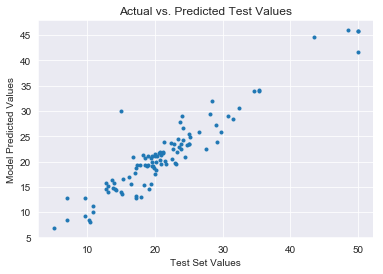

In [108]:
# Plot predicted test set values vs. the actual test set values
# Values should roughly fall along a 45 degree diagonal
plt.plot(y_reg_test, pred_reg, marker='.', linestyle='none')
plt.title('Actual vs. Predicted Test Values')
plt.xlabel('Test Set Values')
plt.ylabel('Model Predicted Values')
plt.show()